# 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
os.getcwd()  # This will show your current working directory
#os.chdir('path_to_least_squares_folder')  # Change to the directory where helpers.py is located
os.chdir('/content/drive/My Drive/Colab Notebooks/Localization')

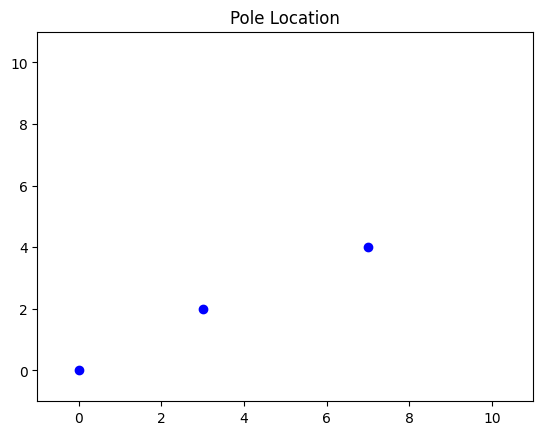

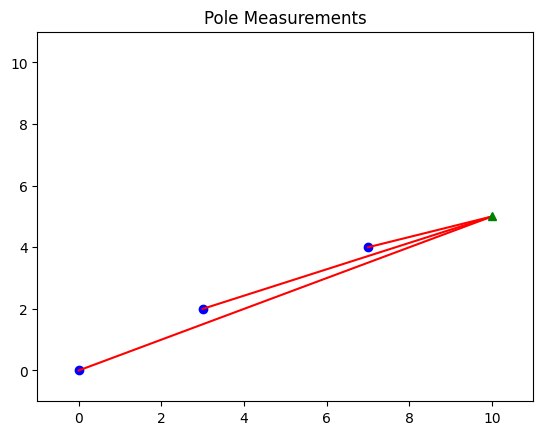

Dist 1: 11.180339887498949
Dist 2: 7.615773105863909
Dist 3: 3.1622776601683795


In [9]:
from helpers import plot_poles, plot_measurements
import matplotlib.pyplot as plt
import numpy as np


def distance(location, pole_location):
    output = (location[0]-pole_location[0])**2
    output += (location[1]-pole_location[1])**2
    output = np.sqrt(output)
    return output


def calc_dist(location, poles):
    print("Dist 1: " + str(distance(location, poles[0])))
    print("Dist 2: " + str(distance(location, poles[1])))
    print("Dist 3: " + str(distance(location, poles[2])))


location = [10, 5]
poles = [[0, 0]]
poles += [[3, 2]]
poles += [[7, 4]]

plot_poles(poles)
plt.title('Pole Location')
plt.show()

plot_poles(poles)
plot_measurements(location, poles)
plt.title('Pole Measurements')
plt.show()

calc_dist(location, poles)

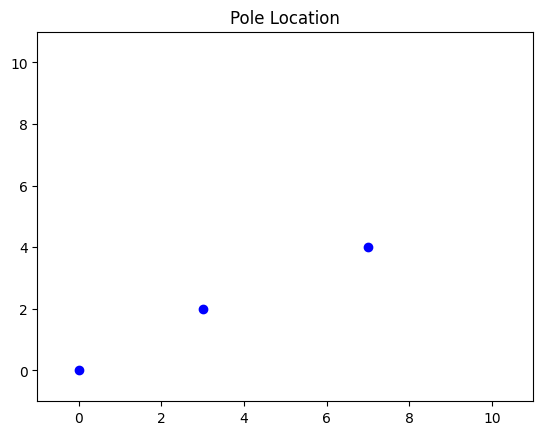

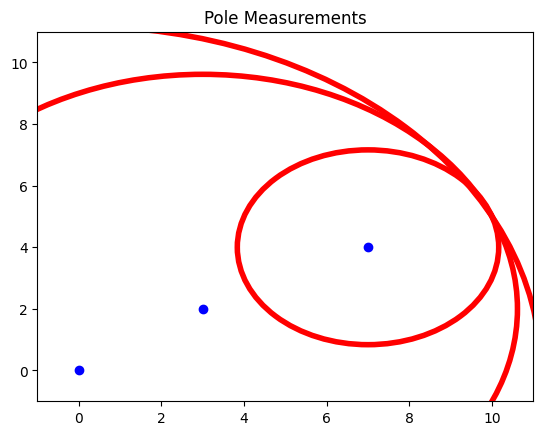

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.21593743326229e-11
             x: [ 1.000e+01  5.000e+00]
           nit: 84
          nfev: 159
 final_simplex: (array([[ 1.000e+01,  5.000e+00],
                       [ 1.000e+01,  5.000e+00],
                       [ 1.000e+01,  5.000e+00]]), array([ 3.216e-11,  5.546e-11,  1.567e-10]))


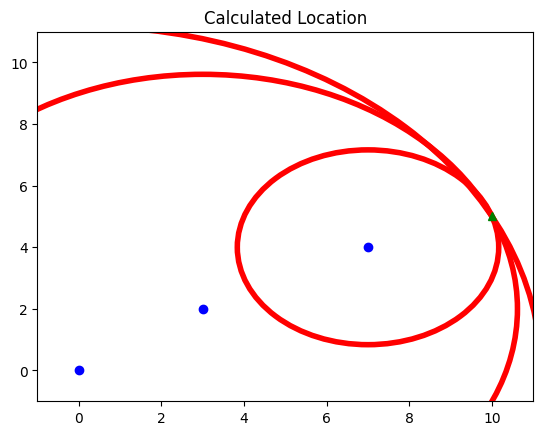

In [11]:
from helpers import plot_poles, plot_measurement_circles, plot_robot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def distance_difference_squared(guess_location, pole, pole_measurement):
    output = (guess_location[0]-pole[0])**2
    output += (guess_location[1]-pole[1])**2
    output = pole_measurement - np.sqrt(output)
    return output**2

def total_cost(guess_location, poles, pole_measurements):
    total = 0
    total += distance_difference_squared(guess_location, poles[0], pole_measurements[0])
    total += distance_difference_squared(guess_location, poles[1], pole_measurements[1])
    total += distance_difference_squared(guess_location, poles[2], pole_measurements[2])
    return total

poles = [[0, 0]]
poles += [[3, 2]]
poles += [[7, 4]]
pole_measurements = [11.180339887498949]
pole_measurements += [7.615773105863909]
pole_measurements += [3.1622776601683795]


plot_poles(poles)
plt.title('Pole Location')
plt.show()

plot_poles(poles)
plot_measurement_circles(poles, pole_measurements)
plt.title('Pole Measurements')
plt.show()

location_solution = minimize(total_cost, [0, 0], method='Nelder-Mead', args=(poles, pole_measurements))
print(location_solution)

plot_poles(poles)
plot_measurement_circles(poles, pole_measurements)
plot_robot(location_solution.x)
plt.title('Calculated Location')
plt.show()


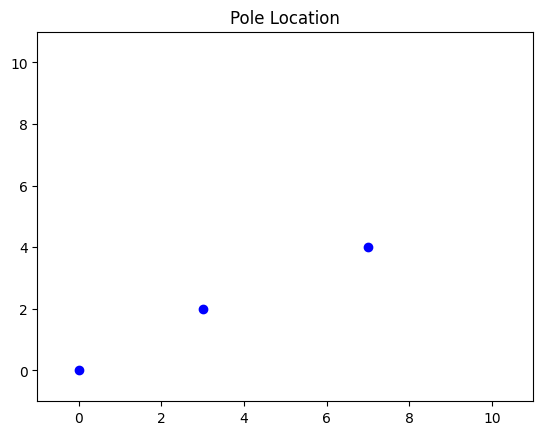

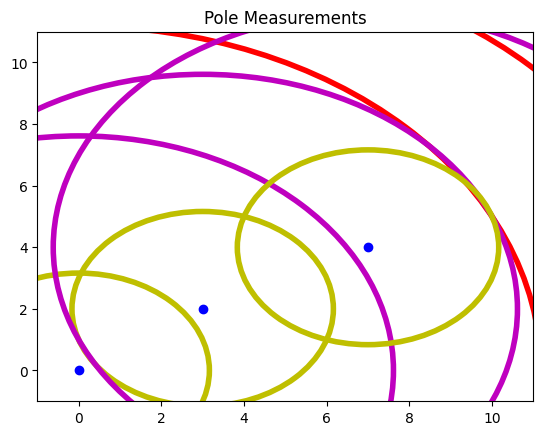

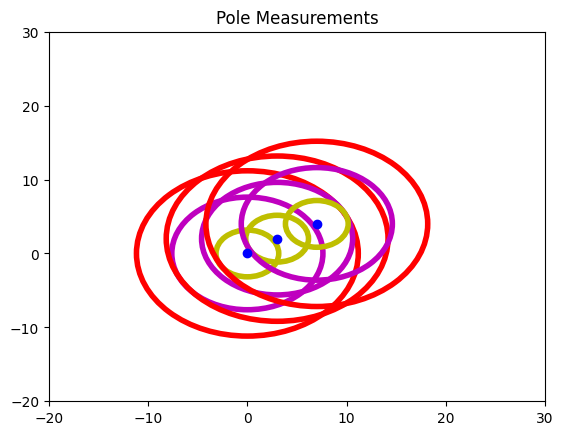

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.0007514446123227795
        x: [ 9.506e+00  5.925e+00]
      nit: 15
      jac: [-4.087e-09  2.776e-09]
     nfev: 54
     njev: 18
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


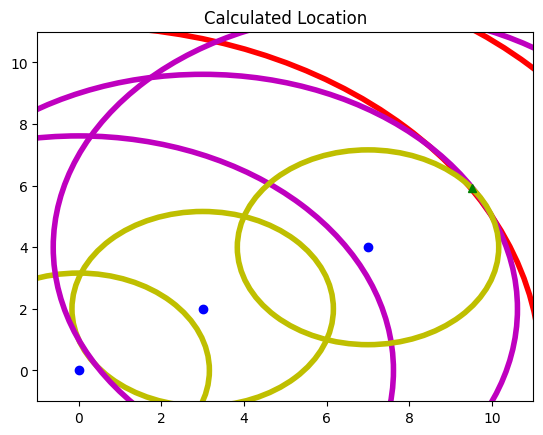

In [12]:
from helpers import plot_poles, plot_measurement_circles2, plot_robot
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


def distance_difference_squared(guess_location, pole, pole_measurements):
    output = (guess_location[0]-pole[0])**2
    output += (guess_location[1]-pole[1])**2
    output = np.sqrt(output)
    diff1 = pole_measurements[0] - output
    diff2 = pole_measurements[1] - output
    diff3 = pole_measurements[2] - output
    output = min(diff1**2, diff2**2, diff3**2)
    return output

# 1D Example
# pole = 5
# pole_measurement = [3, 2, 7]
# guess_location = 2
# distance = 2


def total_cost(guess_location, poles, pole_measurements):
    total = 0
    total += distance_difference_squared(guess_location, poles[0], pole_measurements)
    total += distance_difference_squared(guess_location, poles[1], pole_measurements)
    total += distance_difference_squared(guess_location, poles[2], pole_measurements)
    return total

poles = [[0, 0]]
poles += [[3, 2]]
poles += [[7, 4]]
pole_measurements = [11.180339887498949]
pole_measurements += [7.615773105863909]
pole_measurements += [3.1622776601683795]

plot_poles(poles)
plt.title('Pole Location')
plt.show()

plot_poles(poles)
plot_measurement_circles2(poles, pole_measurements)
plt.title('Pole Measurements')
plt.show()

plot_poles(poles)
plot_measurement_circles2(poles, pole_measurements, zoom_out=True)
plt.title('Pole Measurements')
plt.show()

location_solution = minimize(total_cost, [0, 0], bounds=[[-20, 20], [-20, 20]], args=(poles, pole_measurements))
print(location_solution)

plot_poles(poles)
plot_measurement_circles2(poles, pole_measurements)
plot_robot(location_solution.x)
plt.title('Calculated Location')
plt.show()
